In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import wrangle_zillow

## 1.Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

In [132]:
df= wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [141]:
df=df.rename(columns={'bedroomcnt':'bedroom','bathroomcnt':'bathroom','calculatedfinishedsquarefeet':'footage_area','taxvaluedollarcnt':'home_value','yearbuilt':'year'})
df.head()

,bedroom,bathroom,footage_area,home_value,year,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


### Unscaled Data visualisation

bedroom


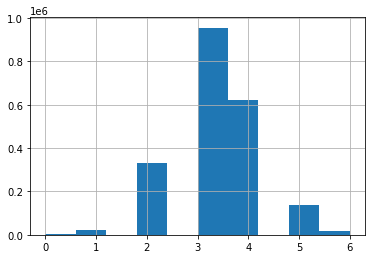

bathroom


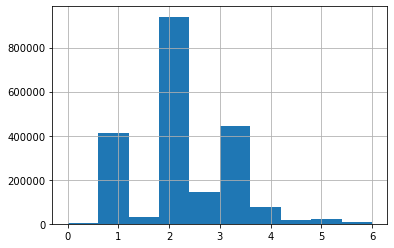

footage_area


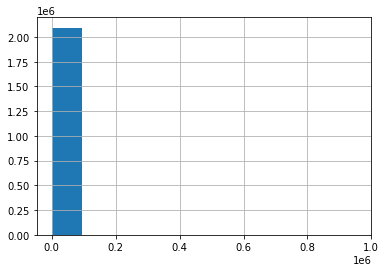

home_value


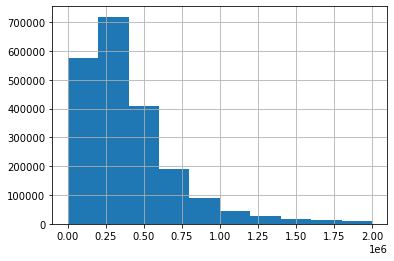

year


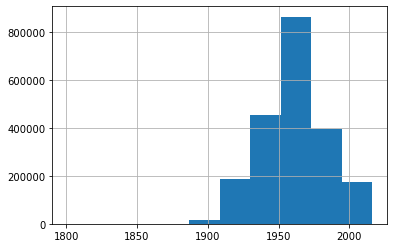

taxamount


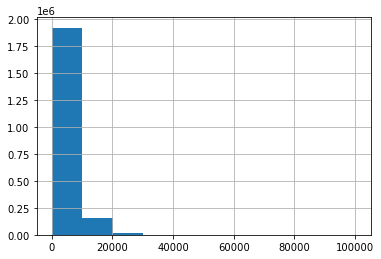

fips


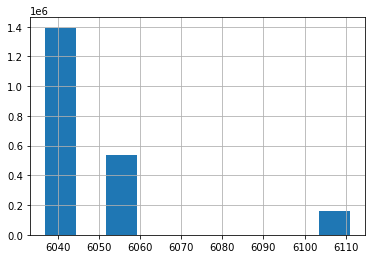

In [140]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

### Scaled Data visualisation

In [ ]:
# columns that needed to be scaled in a list. 
scale_col=[bathroom, bedroom,footage_area]

In [115]:
scaler=sklearn.preprocessing.MinMaxScaler()

In [116]:
# splitting the data into train, validate and test sample.
x_train_and_validate, x_test = train_test_split(df, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

In [117]:
print(x_train.shape, x_validate.shape, x_test.shape)

(1178202, 7) (392735, 7) (523646, 7)


In [118]:
x_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
987314,3,2.0,1281,101143,1990,1980.56,6037
1586873,2,1.0,865,223957,1940,3239.24,6037
632182,3,2.0,1568,338413,1954,4646.58,6037
103324,3,1.0,1178,442000,1942,5279.42,6059
1251707,4,2.0,2023,301770,1949,3868.67,6037


bedroomcnt


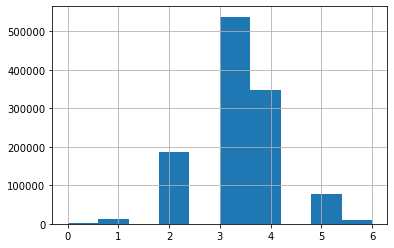

bathroomcnt


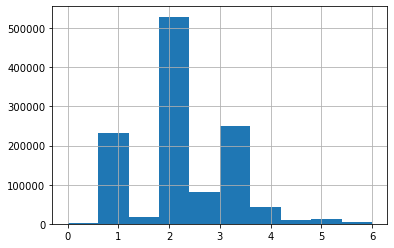

calculatedfinishedsquarefeet


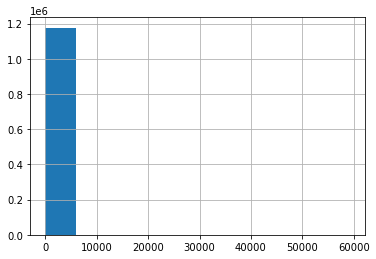

taxvaluedollarcnt


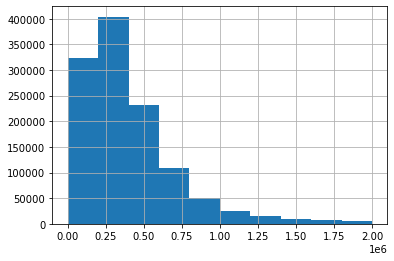

yearbuilt


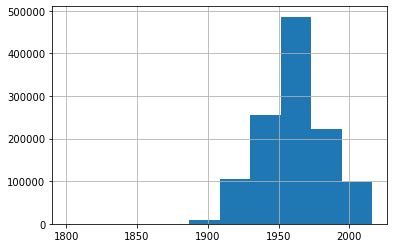

taxamount


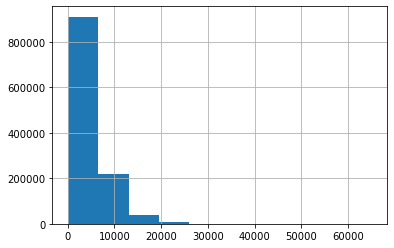

fips


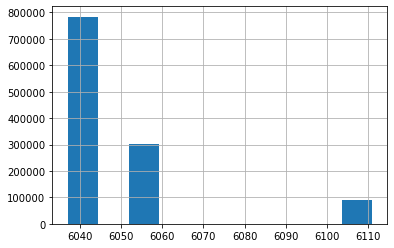

In [58]:
# visualising unscaled x_train sample.

for col in x_train.columns:
    print (col)
    x_train[col].hist()
    plt.show()

In [119]:
# fit the scaler to train data sample
scaler.fit(x_train)

MinMaxScaler()

In [120]:
#use.transform to apply scaling to all splitted data samples
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

In [121]:
# for col in x_train:
#     scaler=sklearn.preprocessing.MinMaxScaler()
#     x_train[col]= scaler.fit_transform(x_train[[col]])

In [122]:
# this is new scaled fit and transformed data
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.500000,0.333333,0.001344,0.050561,0.879070,0.021110,0.000000
1,0.333333,0.166667,0.000907,0.111969,0.646512,0.034617,0.000000
2,0.500000,0.333333,0.001645,0.169198,0.711628,0.049719,0.000000
3,0.500000,0.166667,0.001236,0.220992,0.655814,0.056510,0.297297
4,0.666667,0.333333,0.002123,0.150876,0.688372,0.041371,0.000000


bedroomcnt


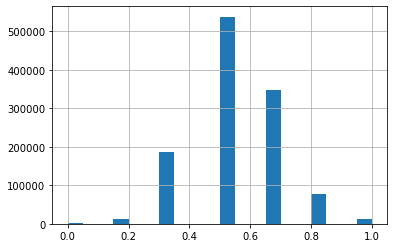

bathroomcnt


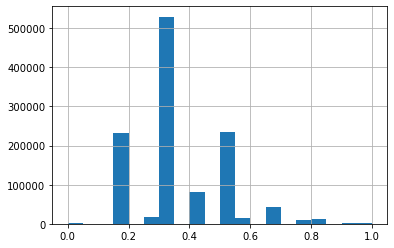

calculatedfinishedsquarefeet


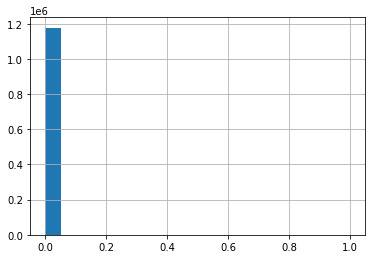

taxvaluedollarcnt


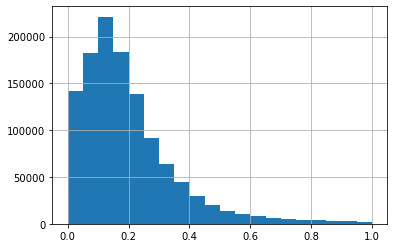

yearbuilt


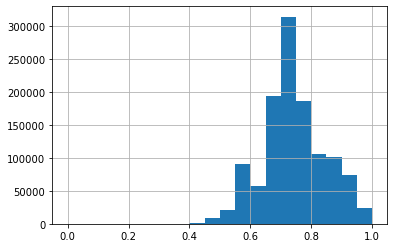

taxamount


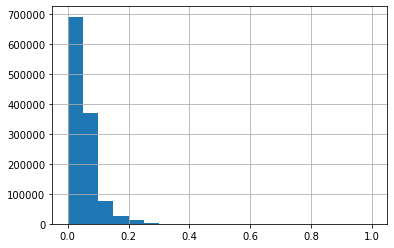

fips


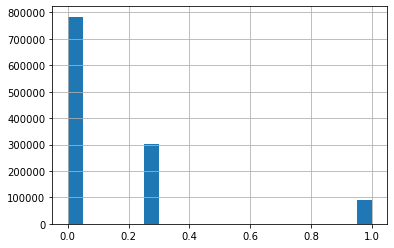

In [124]:
#visualizing scaled data
for col in x_train_scaled_df:
    print(col)
    x_train_scaled_df[col].hist(bins=20)
    plt.show()

### 2.Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [127]:
inverse= scaler.inverse_transform(x_train_scaled)
df= pd.DataFrame(inverse,columns=x_train.columns)
df.head()
    

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,3.0,2.0,1281.0,101143.0,1990.0,1980.56,6037.0
1,2.0,1.0,865.0,223957.0,1940.0,3239.24,6037.0
2,3.0,2.0,1568.0,338413.0,1954.0,4646.58,6037.0
3,3.0,1.0,1178.0,442000.0,1942.0,5279.42,6059.0
4,4.0,2.0,2023.0,301770.0,1949.0,3868.67,6037.0


### 3.Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [129]:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(output_distribution='normal', random_state=123)
x_train_quantile= quantile_transformer.fit_transform(x_train)


In [130]:
quantile= pd.DataFrame(x_train_quantile, columns=x_train.columns)
quantile.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,-0.256198,-0.157469,-0.602943,-1.158409,1.242061,-0.910426,-5.199338
1,-1.331018,-1.280981,-1.702890,-0.462160,-1.059682,-0.319738,-5.199338
2,-0.256198,-0.157469,-0.061513,0.072371,-0.291367,0.214391,-5.199338
3,-0.256198,-1.280981,-0.855287,0.451123,-0.965420,0.416679,0.819656
4,0.761353,-0.157469,0.539915,-0.082819,-0.686350,-0.062613,-5.199338


(array([  2459.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12731.,      0.,      0.,      0., 186695.,
             0.,      0., 538170.,      0.,      0.,      0., 348908.,
             0.,      0.,  78003.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,  11236.]),
 array([-5.19933758, -4.90223258, -4.60512757, -4.30802257, -4.01091756,
        -3.71381256, -3.41670755, -3.11960255, -2.82249754, -2.52539254,
        -2.22828754, -1.93118253, -1.63407753, -1.33697252, -1.03986752,
        -0.74276251, -0.44565751, -0.1485525 ,  0.1485525 ,  0.44565751,
         0.74276251,  1.03986752,  1.33697252,  1.63407753,  1.93118253,
         2.22828754,  2.52539254,  2.82249754,  3.11960255,  3.41670755,
         3.71381256,  4.01091756,  4.30802257,  4.60512757,  4.90223258,
         5.19933758]),
 <BarContainer object of 35 artists>)

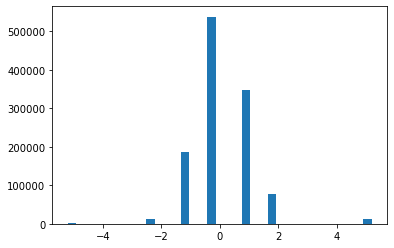

In [131]:
plt.hist(quantile.bedroomcnt, bins=35)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [74]:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(random_state=123)
x_train_quantile= quantile_transformer.fit_transform(x_train)

In [75]:
x_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
817182,0.333333,0.166667,0.014843,0.087692,0.595349,0.039522,1.000000
232818,0.666667,0.500000,0.042081,0.217513,0.855814,0.083486,0.000000
334226,0.500000,0.416667,0.049106,0.480516,0.902326,0.148353,0.297297
1075691,0.500000,0.333333,0.034786,0.242038,0.679070,0.086707,0.000000
1482729,0.500000,0.333333,0.023134,0.268515,0.706977,0.099454,0.000000


In [ ]:
for col in x_train:
    scaler=sklearn.preprocessing.MinMaxScaler()
    x_train[col]= scaler.fit_transform(x_train[[col]])